In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
air_traffic = pd.read_csv('Air_Traffic.csv')
air_traffic

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [9]:
x = air_traffic.iloc[:,8:9]
# x['Price Category Code']
x['Price Category Code'] = x['Price Category Code'].map({'Low Fare':0, 'Other':1})

### WCSS

In [11]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_13505/1645758320.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(x)
/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_13505/1645758320.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_13505/1645758320.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_13505/1645758320.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)
/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_13505/1645758320.py:5: ConvergenceWarning: Nu

In [12]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [14]:
clusters = kmeans.fit_predict(x)

In [15]:
x['Clusters'] = clusters

In [16]:
x

,Price Category Code,Clusters
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
15002,0,1
15003,0,1
15004,0,1
15005,1,0


In [32]:
Low_fare = x['Clusters'].value_counts()[0]
Others = x['Clusters'].value_counts()[1]

TypeError: can only concatenate str (not "numpy.int64") to str

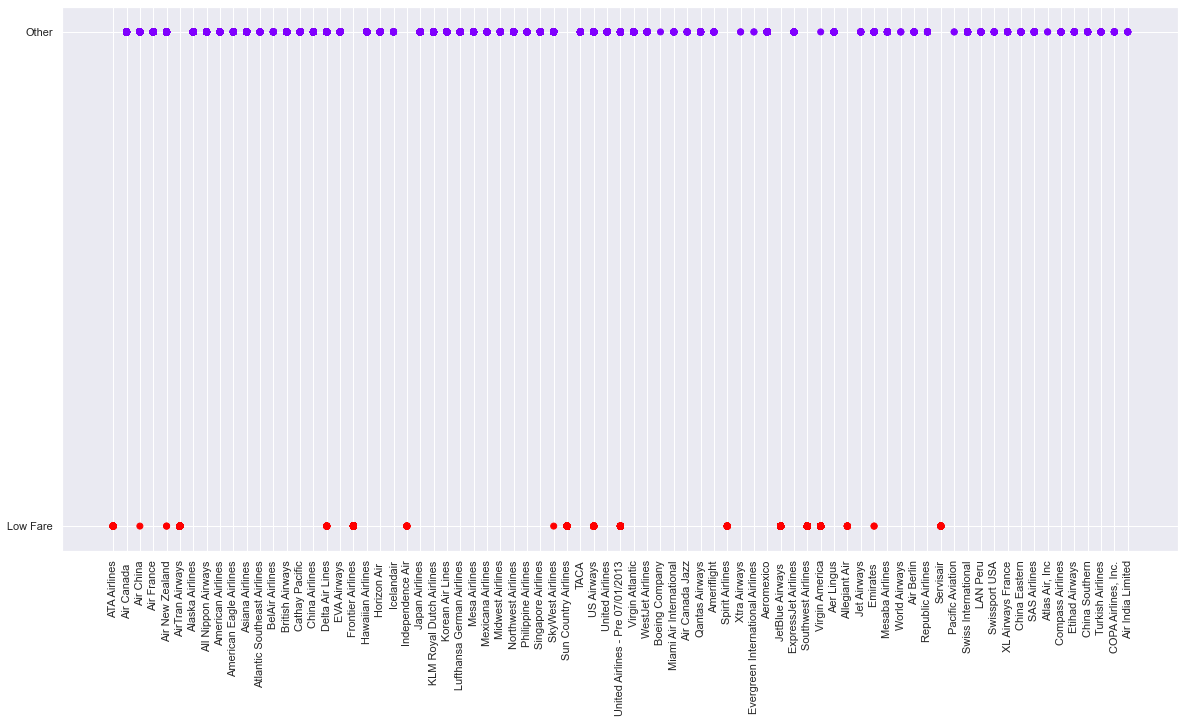

In [55]:

plt.figure(figsize=(20,10))
s = plt.scatter(air_traffic['Operating Airline'], air_traffic['Price Category Code'], c= clusters, cmap='rainbow')
plt.xticks(rotation=90)
plt.legend(handles=s.legend_elements()[0],labels=['Others '+Others,'Low Fare '+Low_fare],scatterpoints=1,
           loc='lower right')
plt.show()